<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/HandsOnML-AI/blob/master/Training_simple_ML_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we discuss two of the earliest ML algorithms developed for Classification task :\
1. Perceptron\
2. Adaptive Linear Neuron\
This helps understand the fundamentals of training an algorithm for a task at hand. The same idea is extrapolated to complex algorithms used in deep learning.

McCullock- Pitts (MCP) : Taking inspiration of human brain cell to design an artificially intelligent machine, it was proposed that the human brain cell opertion can be simplified to a logic gate which receives multiple signals through dendrites and upon electrical signals crossing a certain threshold, gives an output signal , else there is no output signal. The entire human neural circuitry is a huge scale up of this fundamental phenomenon.

Formal definition:\
Assume m inputs [x1,x2...xm] arrive at a neuron and the weights associated with them are [w1,w2...wm]. there is an activation function $\phi$ .\
The output from the neuron is - $\phi(z)$ \
where z is $\(w1 \cdot x1 + w2 \cdot x2 + ... wm \cdot xm)\$

Vector representation:\
w = $\begin {bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}$, x = $\begin {bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}$,

One commonly used activation function could be:\
f(x)= $\begin{cases}
    1,& \text{if } z\geq \theta\\
    -1,              & \text{otherwise}
\end{cases}$\

z = $w_0 \cdot x_0 + w_1 \cdot x_1 + ... w_m \cdot x_m$

For simplicity the theta can be brought to the left making $w_0 = -\theta$ and $x_0 = 1$.\
z = $w_0 \cdot x_0 + w_1 \cdot x_1 + ... w_m \cdot x_m$ = $w^T \cdot x$ \

$\phi(z)= \begin{cases}
    1,& \text{if } z\geq 0 \\
    -1, & \text{otherwise}
\end{cases}$ \

The -$\theta$ is called the bias unit in ML literature



Rosenblat's perceptron learning rule: \
1. Initialize weights with zeros or small random numbers. \
2. Compute the output through forward pass.
3. Take feedback from the actual label and update the weights accordingly. \
$w_j := w_j + \delta w_j$ \

$\delta w_j = \eta (y^{i} - \hat{y}^{i}) x^{i}_j$

The perceptron learning rule is a simple elegant learning algorithm which nudges the weights to more positive value if label is misclassified as negative and to more negative value if misclassified as positive. if correctly classified, no changes.Also, the delta is proportional to the input x.\
But it is to be remembered that perceptron learning converges only if the dataset is linearly separable, else it continues learning but there will be no improvement.

An object-oriented perceptron API in Python

In [8]:
import numpy as np
class Perceptron(object):
  '''
  Parameters
  ----------
  eta : float
    Learning rate (between 0.0 and 1.0)
  num_iters : int
    Number of iterations
  random_state : int
    Seed to set random state

  Attributes
  ----------
  w_ : 1d-array
    Weights after fitting
  errors_ : list
    Number of misclassifications in every epoch
  '''
  def __init__(self, eta=0.01, num_iters=50, random_state=42):
    self.eta = eta
    self.num_iters = num_iters
    self.random_state = random_state

  def fit(self, X, y):
    '''
    Parameters
    ----------
    X : input dataset , array like data structure of shape [num_samples, num_features]
    y : int target labels, array like data structure of shape [num_samples,]
    Returns
    -------
    self : object
    '''

    random_gen = np.random.RandomState(self.random_state)
    self.w_ = random_gen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) # includes bias as well
    self.errors_ = []
    for i in range(self.num_iters):
      errors = 0
      for xi,yi in zip(X,y):
        delta = self.eta * (yi - self.predict(xi))
        self.w_[1:] += delta * xi
        self.w_[0] += delta
        errors += int(delta!=0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
      '''
      helper function to compute z = w^T.X
      '''
      return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
      '''
      returns the result of forward pass including the activation function
      '''
      return np.where(self.net_input(X) >= 0.0, 1, -1)






The reason we are initializing weights to random values from random normal distribution is because we want initial values which are small and also both positive and negative values especially for classification using perception learning algorithm .if initialized to zeros, the weight vector will be scaled and there will be no direction infirmation added.

Instead of performing dot using native python loops , we prefer doing it in numpy because numpy in the backend leverages modern CPU architecture optimizations like SIMD [vectorization of for loops] , and uses the highly efficient BLAS linear algebra library written in c and fortran.

Training a perceptron model on the Iris dataset: \
Iris dataset has a samples of flower information of three flowers. we are going to pick two flowers and do binary classification and inspite of having many features, we are going to pick two features for better visualization - sepal length and petal length. \
this can be scaled to do one-versus-all classification [multi-class classification] taking into account many features

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Observing the first five values, we see that they flower category is in the fifth column, which will be our target label while training. there are four features and all of them are numerical.

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.shape

(150, 5)

There are 150 samples containing 5 features in the pandas data frame including the target 'flower name'. we extract the second and third flower and omit the first category , i.e we chose only Iris versicolor and Iris virginica for our training. also the first feature in column 0 is 'sepal length' and column 2 is 'petal length' which will be our training input dataset

In [5]:
import matplotlib.pyplot as plt

In [9]:
y = df.iloc[50:, 4].values # .values will extract the values and place it in y
y = np.where(y == "Iris-versicolor", -1, 1)

In [7]:
type(y[0]) # a numpy array is already available from .values operator

str

In [10]:
#input data
X = df.iloc[50:, [0,2]].values
X.shape, y.shape

((100, 2), (100,))

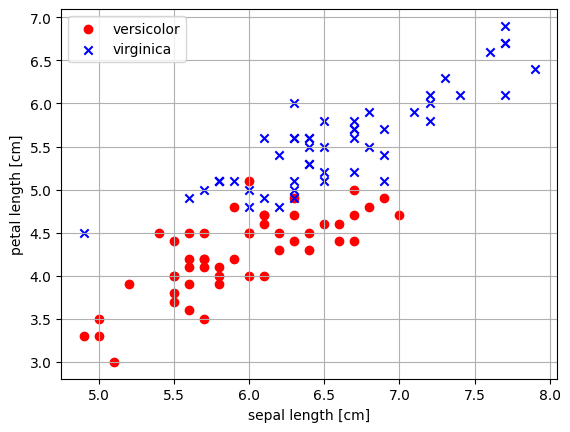

In [11]:
#plot data for visualization
plt.scatter(X[:50,0], X[:50,1], color="r",marker="o" ,label="versicolor")
plt.scatter(X[50:,0], X[50:,1],color="b", marker="x", label="virginica")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend()
plt.grid(True)
plt.show()

In the plot, we observe that the two features indeed separate the flowers into two categories but is completely linearly separable, there are some overlaps near the boundary region. let us find out if the perceptron algo is able to separate this out. let us set the epochs to 10 initially.

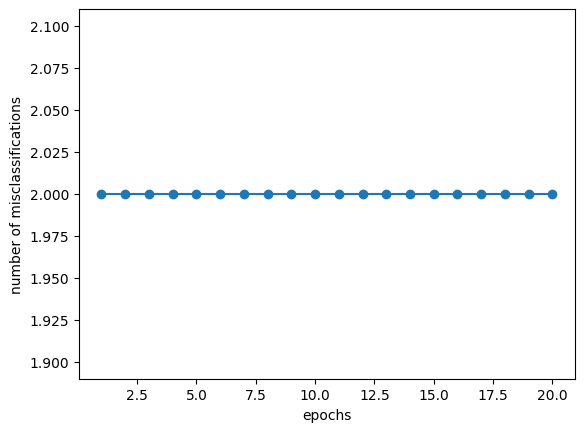

In [12]:
obj_perceptron = Perceptron(eta=0.1,num_iters = 20 )
obj_perceptron.fit(X,y)
#plot errors
plt.plot(range(1,len(obj_perceptron.errors_)+1), obj_perceptron.errors_, marker="o")
plt.xlabel("epochs")
plt.ylabel("number of misclassifications")
plt.show()

Inspite of increasing the iters to 20, there is no learning, it does not converge at all, the error remains stagnated at 2 right from the first epoch. So, the perception seems to be very sensitive to even some overlaps,there should perhaps be complete linear separability , let us now take setosa and versicolor for analysis

In [13]:
y = df.iloc[0:100, 4].values # .values will extract the values and place it in y
y = np.where(y == "Iris-setosa", -1, 1)

In [14]:
#input data
X = df.iloc[0:100, [0,2]].values
X.shape, y.shape

((100, 2), (100,))

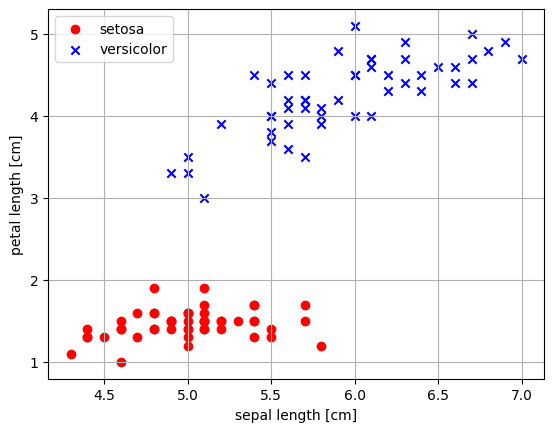

In [15]:
#plot data for visualization
plt.scatter(X[0:50,0], X[:50,1], color="r",marker="o" ,label="setosa")
plt.scatter(X[50:,0], X[50:,1],color="b", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend()
plt.grid(True)
plt.show()

The plot seems convincing that the features are easily linearly separable.let us see if our perception finds that out.

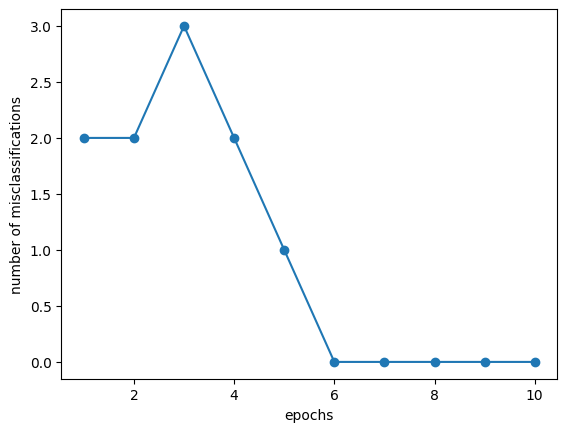

In [16]:
obj_perceptron = Perceptron(eta=0.1,num_iters = 10 )
obj_perceptron.fit(X,y)
#plot errors
plt.plot(range(1,len(obj_perceptron.errors_)+1), obj_perceptron.errors_, marker="o")
plt.xlabel("epochs")
plt.ylabel("number of misclassifications")
plt.show()

we see a better misclassification plot now -> the errors come down with epochs and after epoch 6, the misclassification is completely down to zero, which is cool.

Visualization of decision boundary found by our perceptron


In [17]:
from matplotlib.colors import ListedColormap

In [18]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, class_ in enumerate(np.unique(y)):
    plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')



<ipython-input-18-dfac74905759>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


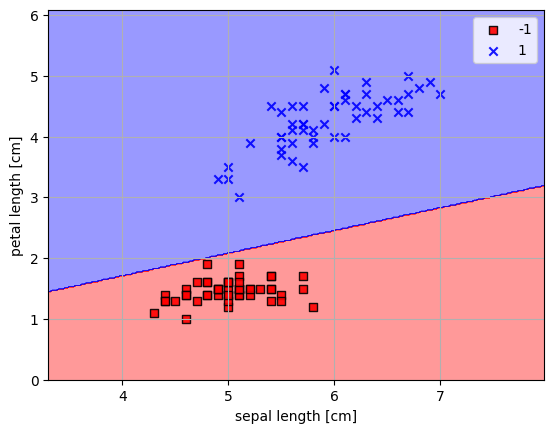

In [19]:
plot_decision_regions(X, y, classifier=obj_perceptron)
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend()
plt.grid(True)
plt.show()

Second method : Adaptive linear neuron
Key difference between adaline and rosenblatt's perceptron learning rule is that here, we update weights based on the comparison of true labels with the linear activation's outputs instead of comparing with predicted labels.

$\phi(z) = w^T \cdot x $ \
After the weight update, to make prediction, the same unit step activation is used to get predicted label.



Minimizing the cost function with gradient descent: \
J = $\frac{1}{2} \Sigma_i (y^{(i)} - (\phi (z^{(i)}))^{2}$

the above cost function is contintuous, differentiable and is convex i.e there is one local optimum which can be found. So, it is an ideal candidate to optimize using stochastic gradient descent to find the minimum of the cost function.


w := w + $\delta$ w \
where, $\delta$ w is given by -$\eta \nabla J(w)$ \
$\delta w = - \eta \frac{\partial{J}}{\partial{w_j}}$ = $\eta \Sigma_i (y^{(i)} - \phi(z^{(i)})) x_j^{i}$

the weight update rule might look similar but the difference is that in adaline, the entity subtracted from GT is a real number and not the predicted label. Also, the weight update happens considering many samples at once and not sample by sample -> hence it is called batch gradient descent

In [20]:
#Python implementation of Adaline
class Adaline(object):
  '''
  Adaptive linear neuron classifier
  Parameters
  -----------
  eta : float
        Learning rate between 0.0 and 1.0

  num_iters : int
        number of epochs
  random_state : int
       Seed for random number generation
  Attributes
  ----------
  w_ : 1d array like data structures
       weights of the model
  errors_ : list
       list of errors per epoch
  '''
  def __init__(self, eta = 0.01, num_iters = 50, random_state = 42):
    self.eta = eta
    self.num_iters = num_iters
    self.random_state = random_state
  def fit(self, X, y):
    '''
    fit method - called during training
    Parameters
    ----------
    X : input data, array like datastructure of shape [num_samples, num_features]
    y : target labels , array like data structure of shape [num_samples,]
    return
    ------
    self : the current class object
    '''
    random_gen = np.random.RandomState(self.random_state)
    self.w_ = random_gen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) # includes bias
    self.cost_ = []
    for i in range(self.num_iters):

        net_input = self.net_input(X)
        activ_output = self.activation(net_input)
        errors = (y- activ_output)
        self.w_[1:] += self.eta * np.dot(X.T, errors)
        self.w_[0] += self.eta * errors.sum()
        cost = 0.5 * (errors**2).sum()
        self.cost_.append(cost)
    return self

  def net_input(self,X):
    '''
    helper function to compute z = w^T.X
    '''
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self,X):
    '''
    activation function : just a pass through in this case
    '''
    return X
  def predict(self,X):
    '''
    returns the result of forward pass including the activation function
    '''
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



In [21]:
X.shape, y.shape

((100, 2), (100,))

the learning rate and num_iters are hyperparameters which are usually found upon experimentation - in this example, we try with two learning rate hyperparametres.


10


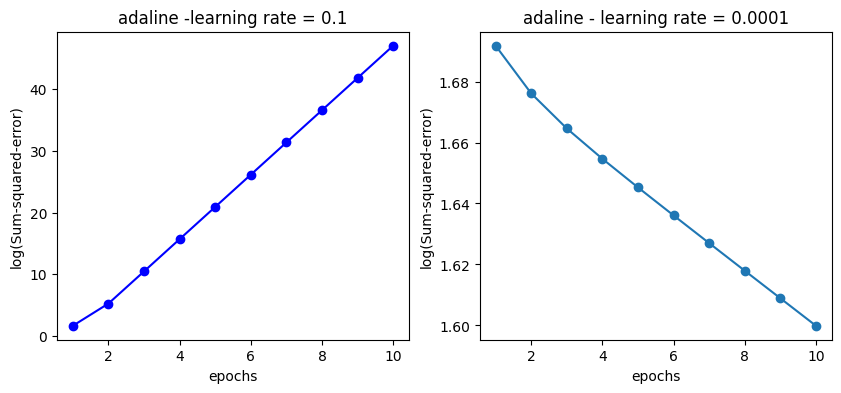

In [22]:
#learning rate = 0.1

fig,ax = plt.subplots(1,2,figsize=(10,4))
aln1 = Adaline(0.1,10,42)
aln1.fit(X,y)
print(len(aln1.cost_))
ax[0].plot(range(1,len(aln1.cost_)+1), np.log10(aln1.cost_), marker="o", color="b")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("adaline -learning rate = 0.1")

aln2 = Adaline(0.0001,10,42)
aln2.fit(X,y)
ax[1].plot(range(1,len(aln2.cost_)+1), np.log10(aln2.cost_), marker="o")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title("adaline - learning rate = 0.0001")
plt.show()

with a higher learning rate, we observe that the error is increasing with number of epochs, because instead of going smoothly down the slope, the gradient descent is jumping from one point to another in a haphazard manner not letting the algo reach the minimum. \
In the second case , it does reach the minimum, but it is very slow , can be sped up with a higher learning rate.



Improvement in gradient descent through feature scaling: \
To help the gradient descent converge to minima , feature normalization helps, where each feature is shifted to mean 0 and standard deviation 1, thereby helping the model view standardized features.

$x_j^{\,\prime} = \frac{x_j - \mu_j}{\sigma_j}$

In [23]:
#with standardization
X_std = X.copy()
X_std[:,0] = (X[:,0] - np.mean(X[:,0])) / X[:,0].std()
X_std[:,1] = (X[:,1] - np.mean(X[:,1])) / X[:,1].std()


<ipython-input-18-dfac74905759>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


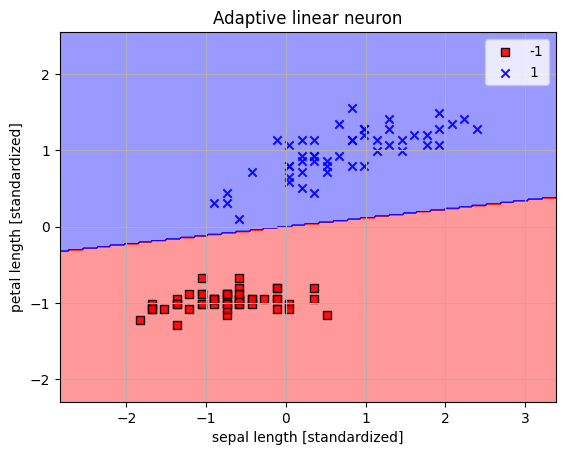

In [25]:
aln = Adaline(num_iters=15, eta=0.01)
aln.fit(X_std,y)
plot_decision_regions(X_std, y, classifier=aln)
plt.title("Adaptive linear neuron")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend()
plt.grid(True)
plt.show()

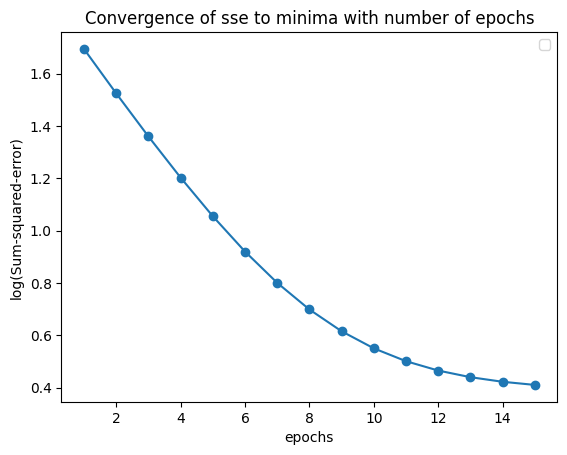

In [26]:
plt.figure(1)
plt.title("Convergence of sse to minima with number of epochs")
plt.plot(range(1,len(aln.cost_)+1), np.log10(aln.cost_), marker="o")
plt.xlabel("epochs")
plt.ylabel("log(Sum-squared-error)")
plt.legend()
plt.show()

with learning rate = 0.01 and a data standardization, the training curve is smooth and converges to a minimum , but still the sse is not zero and has some residual, though the decision boundary is able to seggregate the samples correctly.

In the above case, the weights are updated taking into account the residuals of all samples in the training dataset, this can be computationally expensive and this much data cannot be loaded in GPUs for parallel computation. Another approach is to do stochastic gradient descent where weights are updated per sample on the fly also called online learning.\
Stochastic gradient descent can be thought of as an approximation of gradient descent since it looks at one sample per weight update and also due to more frequent weight updates, it reaches convergence faster. But the error surface is more noisier due to lot of swings in weight updates. this also might help in escaping local minima if we are working with non linear cost functions.\
To achieve satisfying results with SGD, present the data in randomized order by shuffling it. \
Another tweak is to use an adaptive learning rate instead of fixed learning rate. A learning rate which is high initially and then decreases further with epochs help the model reach even global minimum instead of local minimum and helps with stable convergence.\

one possible scheduler could be:
$\eta = \frac{c1}{num\_epochs + c2}$,  where c1 and c2 are constants

A compromise between both is mini-batch gradient descent where we have a batch of 32 or 64 samples for whom weight update is done together, meaning faster convergence to minima compared to full-batch GD and also since we have 64 samples together, we can vectorize the operation instead of doing it in for loop enhancing efficiency.

In [47]:
# Stochastic Gradient descent in python
class AdalineSGD(object):
  '''
  Adaptive Linear Neuron algorithm class with Stochastic Gradient Descent as optimizater
  Parameters
  -----------
  eta : float
     Learning rate between 0.0 and 1.0
  num_iters : int
     Number of epochs
  shuffle : boolean
     boolean to indicate whether to shuffle training data
  random_state : int
    numpy random generation seed
  Attributes
  ----------
  w_ : 1d array like data structures containing weights of shape [num_features+1]
  errors_ : list
    List of costs per epoch
  '''
  def __init__(self, eta, num_iters, shuffle, random_state):
    self.eta = eta
    self.num_iters = num_iters
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
     '''
     fit method - training loop implemented inside with SGD
     Parameters
     ----------
     X : input data, 2D array of shape [num_samples, num_features]
     y : target labels, 1D array of shape [num_samples,]
     Returns:
     self : object
     '''
     self.initialize_weights(X.shape[1])
     self.costs_ = []
     for i in range(self.num_iters):
      if self.shuffle:
        self.shuffle_data(X,y)
      cost = []
      for xi, yi in zip(X, y):
       error = self.update_weights(xi,yi)
       cost.append(error)
      average_cost = sum(cost) / len(y)
      self.costs_.append(average_cost)
     return self

  def initialize_weights(self,m):
    self.random_gen = np.random.RandomState(self.random_state)
    self.w_ = self.random_gen.normal(loc=0.0, scale=0.01, size=1+m)

  def shuffle_data(self, X, y):
    r = self.random_gen.permutation(len(y))
    return X[r],y[r]

  def update_weights(self, xi, yi):
    '''
    helper function to updatw weights
    '''
    net_input = self.net_input(xi)
    activ_output = self.activation(net_input)
    error = (yi - activ_output)
    self.w_[1:] += self.eta * np.dot(xi, error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)








<ipython-input-18-dfac74905759>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


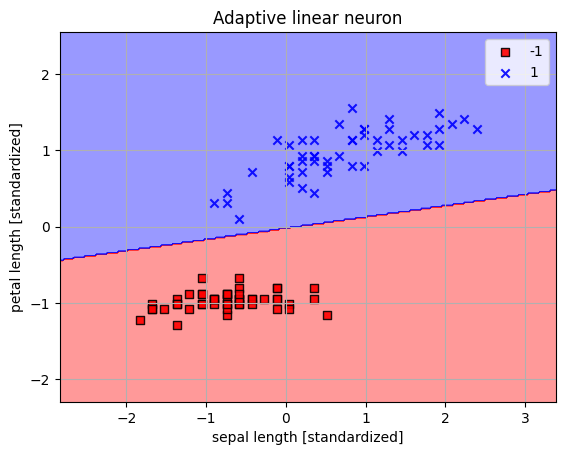

In [48]:
alnSGD = AdalineSGD(num_iters=15, eta=0.01, shuffle=True, random_state=42)
alnSGD.fit(X_std,y)
plot_decision_regions(X_std, y, classifier=alnSGD)
plt.title("Adaptive linear neuron")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend()
plt.grid(True)
plt.show()

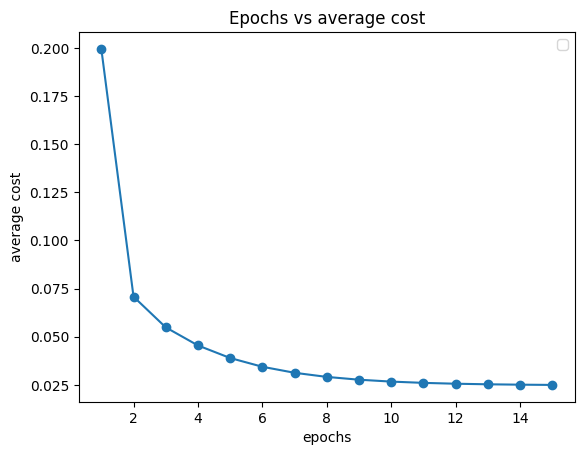

In [49]:
plt.figure(1)
plt.plot(range(1,len(alnSGD.costs_)+1), alnSGD.costs_, marker="o")
plt.title("Epochs vs average cost")
plt.xlabel("epochs")
plt.ylabel("average cost")
plt.legend()
plt.show()

The distinctive feature of the above plot is how quickly the cost converges. this is because of the faster stochastic gradient descent.


One final experiment for the notebook: \
we observed that the perception algorithm could not find an optimum solution to the categorization of Iris-verniclor and Iris-virginica earlier because it was not completely linearly separable and there were some overlaps. \
Let us evaluate the Adaline class on that dataset and see if it is able to converge to optimum solution [get at least an approximate classifer which can separate majority of the labels from one another]

In [50]:
y = df.iloc[50:, 4].values # .values will extract the values and place it in y
y = np.where(y == "Iris-versicolor", -1, 1)
X = df.iloc[50:, [0,2]].values
X.shape, y.shape

((100, 2), (100,))

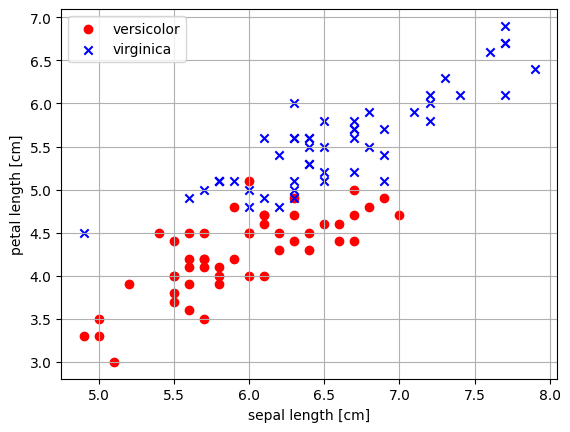

In [51]:
plt.scatter(X[:50,0], X[:50,1], color="r",marker="o" ,label="versicolor")
plt.scatter(X[50:,0], X[50:,1],color="b", marker="x", label="virginica")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
X_std = X.copy()
X_std[:,0] = (X[:,0] - np.mean(X[:,0])) / X[:,0].std()
X_std[:,1] = (X[:,1] - np.mean(X[:,1])) / X[:,1].std()

<ipython-input-18-dfac74905759>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == class_, 0], y = X[y == class_,1], alpha=0.9 , c = colors[idx], marker=markers[idx], label=class_, edgecolor='black')


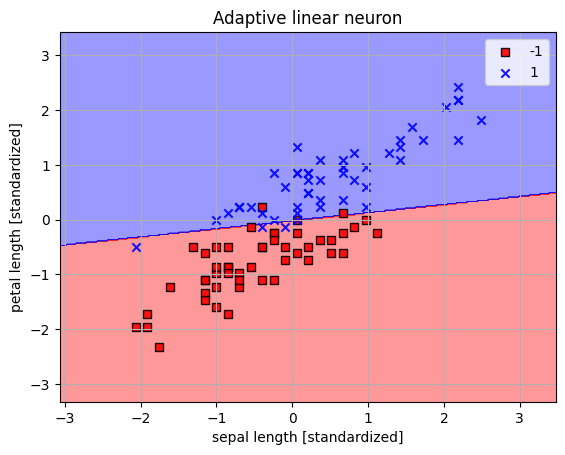

In [53]:
aln = AdalineSGD(0.01, 15, True, 42)
aln.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=alnSGD)
plt.title("Adaptive linear neuron")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend()
plt.grid(True)
plt.show()


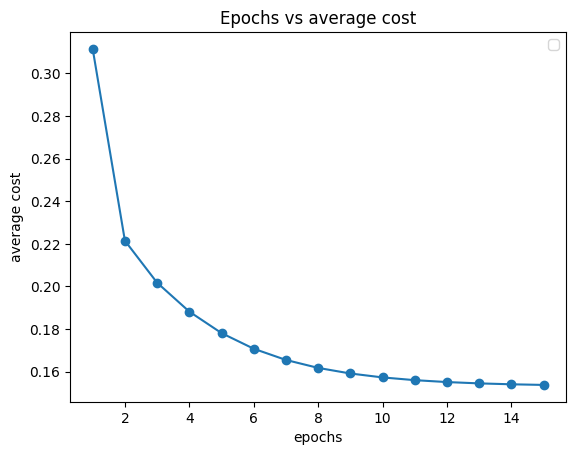

In [55]:
plt.figure(1)
plt.plot(range(1,len(aln.costs_)+1), aln.costs_, marker="o")
plt.title("Epochs vs average cost")
plt.xlabel("epochs")
plt.ylabel("average cost")
plt.legend()
plt.show()

the Adaline is not that bad at all! in fact it is able to find a good enough decision boundary which can separate versicolor and virginica.
also, when we look at the cost vs epochs plot, we see that the cost has come down and has converged to a value[non zero] , whereas in Perceptron , the cost did not even converge, it got stuck with the same error and was unable to learn the decision boundary. The simple trick of introducing SSE in error calculation helped solve the problem keeping everything the same.

AdaLine >>>> perceptron